# Sales Forecasting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the datasets of train, features and stores

train_df = pd.read_csv('train.csv')
feature_df = pd.read_csv('features.csv')
stores_df = pd.read_csv('stores.csv')

In [3]:
# to get the shape of the train dataframe

train_df.shape

(421570, 5)

In [4]:
# to get the first 5 rows of train dataset

train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
# to get the info of train_df

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [6]:
# to get the features of the train_df

train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [7]:
# to get the statistical details of the train_df

train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [8]:
# to get the null values of the train_df

train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [9]:
# to get the shape of the feature dataframe

feature_df.shape

(8190, 12)

In [10]:
# to get the first 5 rows of feature dataset

feature_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
# to get the info of feature_df

feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [12]:
# to get the features of the feature_df

feature_df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [13]:
# to get the statistical details of the feature_df

feature_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [14]:
# to get the null values of the feature_df

feature_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [15]:
# to get the shape of the stores dataframe

stores_df.shape

(45, 3)

In [16]:
# to get the first 5 rows of stores dataset

stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [17]:
# to get the info of stores_df

stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [18]:
# to get the features of the stores_df

stores_df.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [19]:
# to get the statistical details of the stores_df

stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [20]:
# to get the null values of the stores_df

stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [21]:
# merging the train dataset with features dataset

train_df = pd.merge(train_df, feature_df.drop(['IsHoliday'], axis=1), how ='left', on = ['Store', 'Date'])



In [22]:
# merging the store dataset with the above train dataset

train_df = pd.merge(train_df, stores_df, how = 'left', on = ['Store'])

In [23]:
# to check the shape of the merged dataframe

train_df.shape

(421570, 16)

In [24]:
# to get the first 5 rows of merged dataframe

train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [25]:
# to get the info of the merged dataframe

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [26]:
# to get the statistical details of the merged dataframe

train_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [27]:
# to get the min and max of the weekly sales data

print('Min Date in data: ',train_df['Date'].min())
print('Max Date in data: ',train_df['Date'].max())

Min Date in data:  2010-02-05
Max Date in data:  2012-10-26


  Type  Store
0    A     22
1    B     17
2    C      6


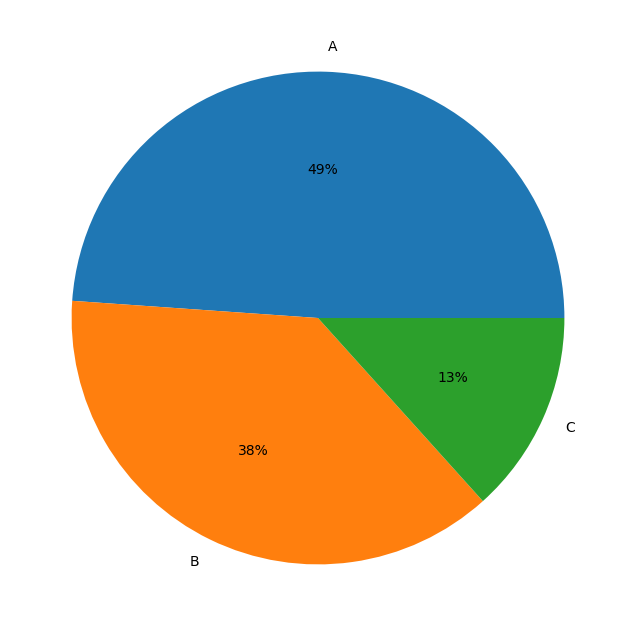

In [28]:
# to visualize the distribution of the store type among these stores.

temp = pd.DataFrame(train_df.groupby('Type')['Store'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (15,8))
plt.pie(temp['Store'], labels = temp['Type'], autopct = '%.0f%%')
plt.show()

From the above plot it is clear that there are total 3 store types named A, B and C. In that A having a share of 49% of total stores, B having a share of 38% of total stores, and C having a share of 13% of total stores.

<AxesSubplot: xlabel='Type', ylabel='Size'>

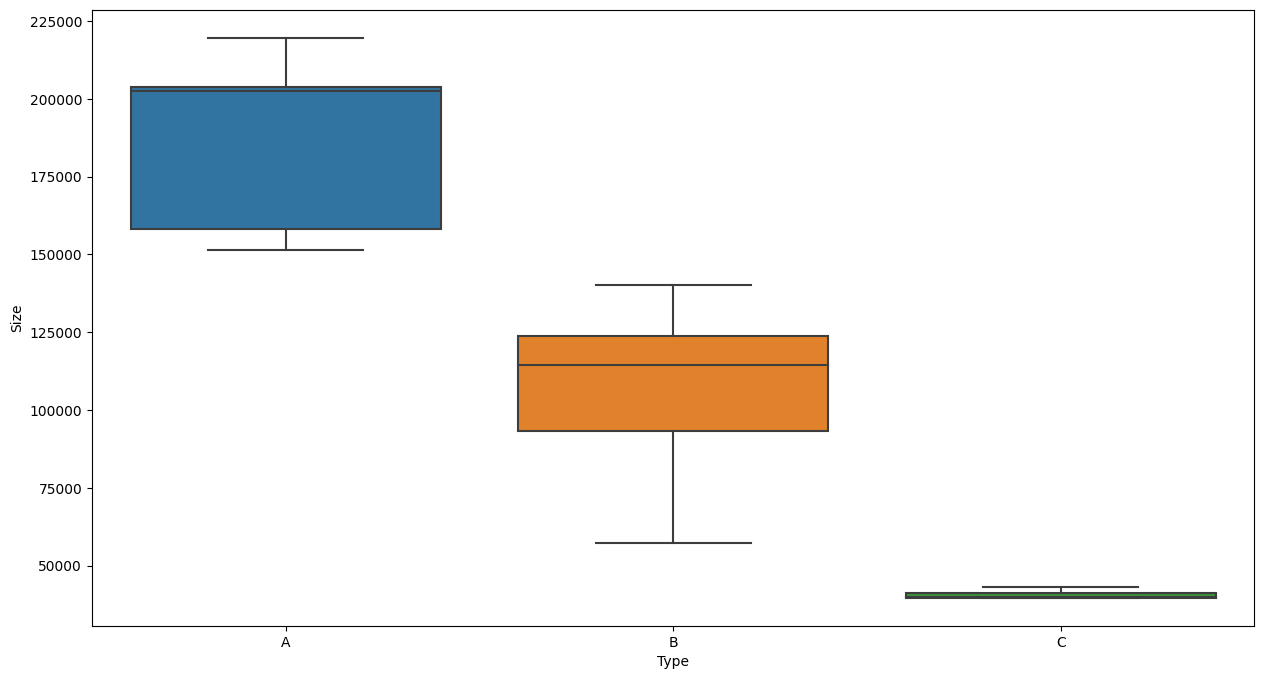

In [29]:
# to get the size distribution of stores for each store type

plt.figure(figsize = (15, 8))
sns.boxplot(x = 'Type', y = 'Size', data = train_df, showfliers = False)

From the above plot it is clear that store type A are the largest one, store type B are smaller than A, and store type C are the smallest one.

<AxesSubplot: xlabel='Type', ylabel='Weekly_Sales'>

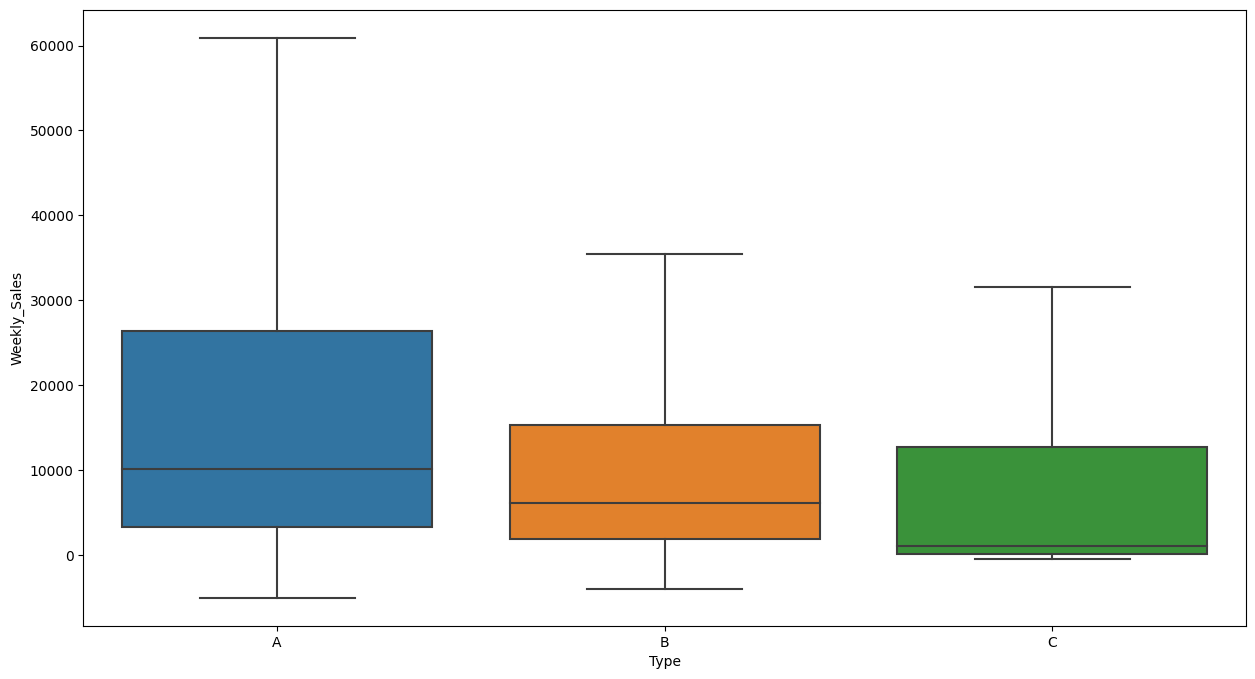

In [30]:
# to get the distribution of the weekly sales based on store type

plt.figure(figsize = (15,8))
sns.boxplot(x = 'Type', y = 'Weekly_Sales', data = train_df, showfliers = False)

From the above plot, it is clear that weekly sales are on the higher side for A compared with B and C.

<AxesSubplot: xlabel='IsHoliday', ylabel='Weekly_Sales'>

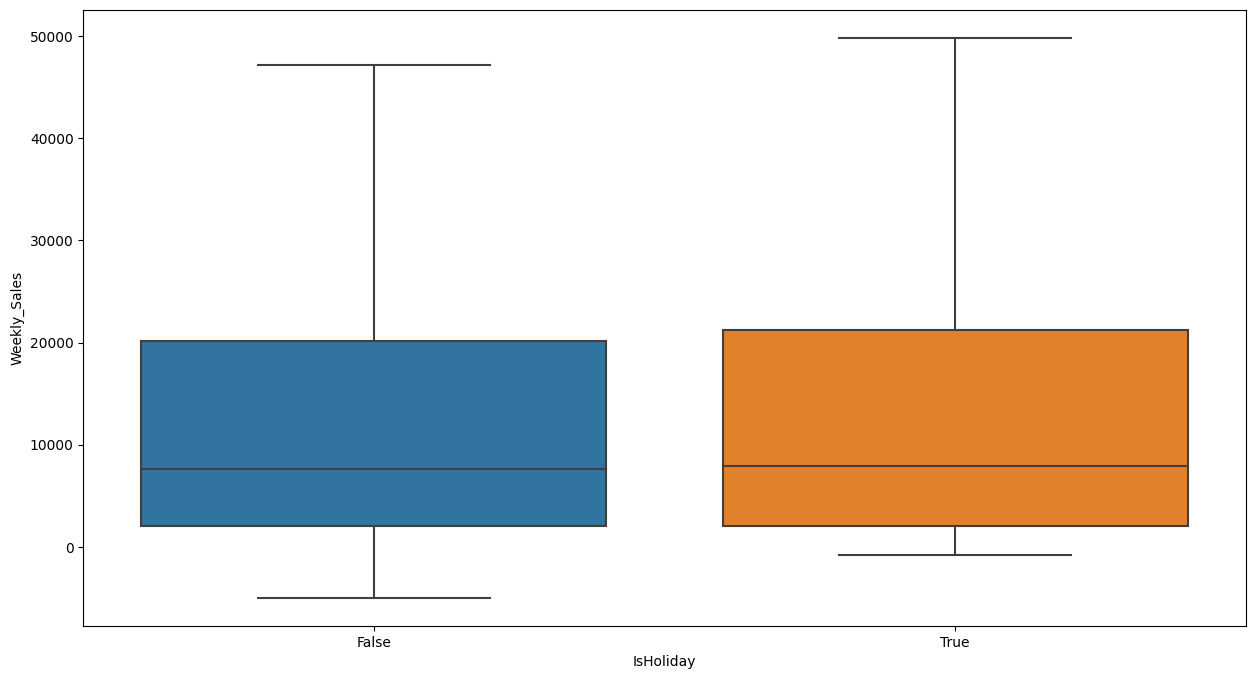

In [31]:
# to get the impact of holidays on weekly sales

plt.figure(figsize = (15,8))
sns.boxplot(x = 'IsHoliday', y = 'Weekly_Sales', data = train_df, showfliers = False)

From the above plot, it is clear that there is no major impact observed of holidays on weekly sales.

In [32]:
# to get the correlation between the numerical features and weekly sales by using heat map

<AxesSubplot: >

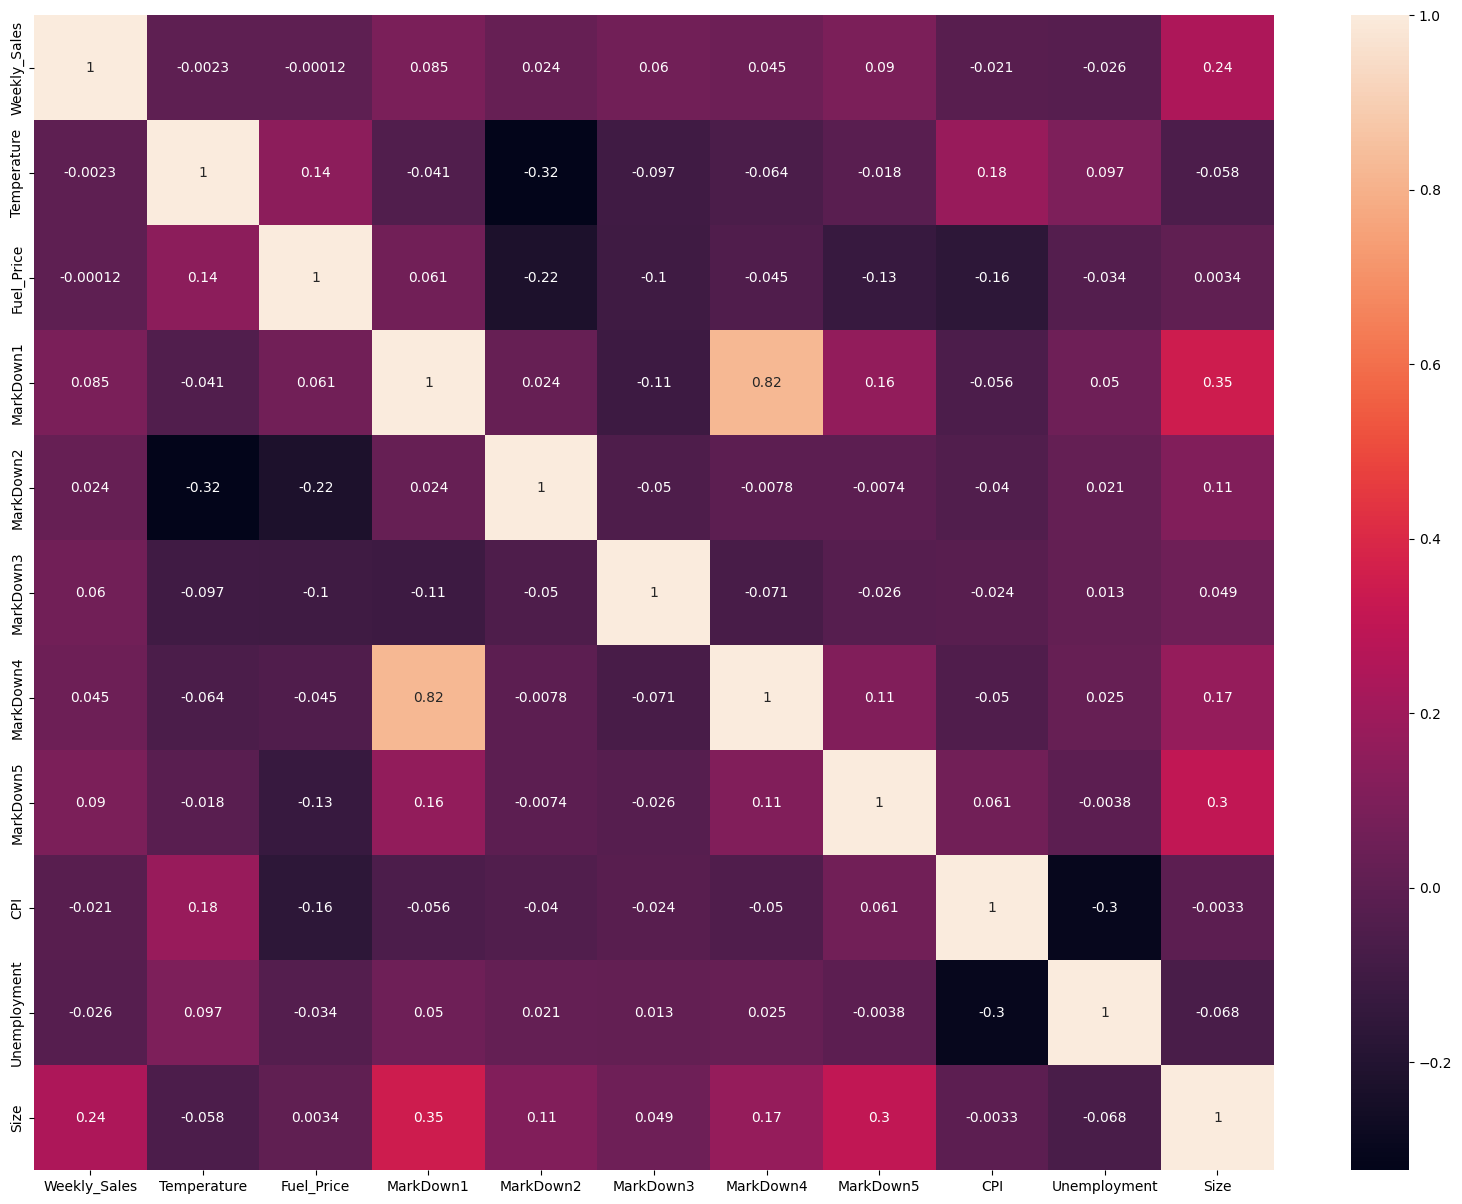

In [33]:
feature_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']
plt.figure(figsize = (20,15))
sns.heatmap(train_df[feature_cols].corr(), annot = True)
        

# Data Preprocessing

In [34]:
# Imputing the null values

train_df['MarkDown1'] = train_df['MarkDown1'].fillna(0)
train_df['MarkDown2'] = train_df['MarkDown2'].fillna(0)
train_df['MarkDown3'] = train_df['MarkDown3'].fillna(0)
train_df['MarkDown4'] = train_df['MarkDown4'].fillna(0)
train_df['MarkDown5'] = train_df['MarkDown5'].fillna(0)


In [35]:
# Feature extraction
# Creating Year, month & date

train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['month_date'] = train_df["Date"].apply(lambda i : i.month)
train_df['day_date'] = train_df["Date"].apply(lambda i : i.month)
train_df['year_date'] = train_df["Date"].apply(lambda i : i.month)

In [36]:
# one hot encoding

cols_to_encode = ['Type', 'IsHoliday']
train_df = pd.get_dummies(data = train_df, columns = cols_to_encode, drop_first = True)

In [37]:
# Standard Scaler

standard_scaler = StandardScaler()
feature_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']
transformed_features = standard_scaler.fit_transform(train_df[feature_cols])

train_df[feature_cols] = transformed_features

In [38]:
# spliting the data into train and test

feature_cols = train_df.columns.tolist()
feature_cols = [i for i in feature_cols if i not in ['Date', 'Weekly_Sales']]

X_train, X_test, Y_train, Y_test = train_test_split(train_df[feature_cols], train_df['Weekly_Sales'], test_size = 0.3, random_state = 34) 

# Developing the Machine Learning models

# KNN Regression model

In [39]:
# training the model

from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=12, n_jobs=5)
knn_regressor.fit(X_train, Y_train)
Y_pred = knn_regressor.predict(X_test)

In [40]:
# to get the performance

print('Mean absolute error: ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Root mean square error: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('Accuracy score: ', knn_regressor.score(X_test, Y_test))


Mean absolute error:  0.31323152707007224
Root mean square error:  0.5552310812295835
Accuracy score:  0.692013806876012


From the above model it is showing that the acuuracy score is only 0.69.
Lets plot the scatter plot between observed and predicted values of weekly sales in the test data.


<AxesSubplot: xlabel='Weekly_Sales'>

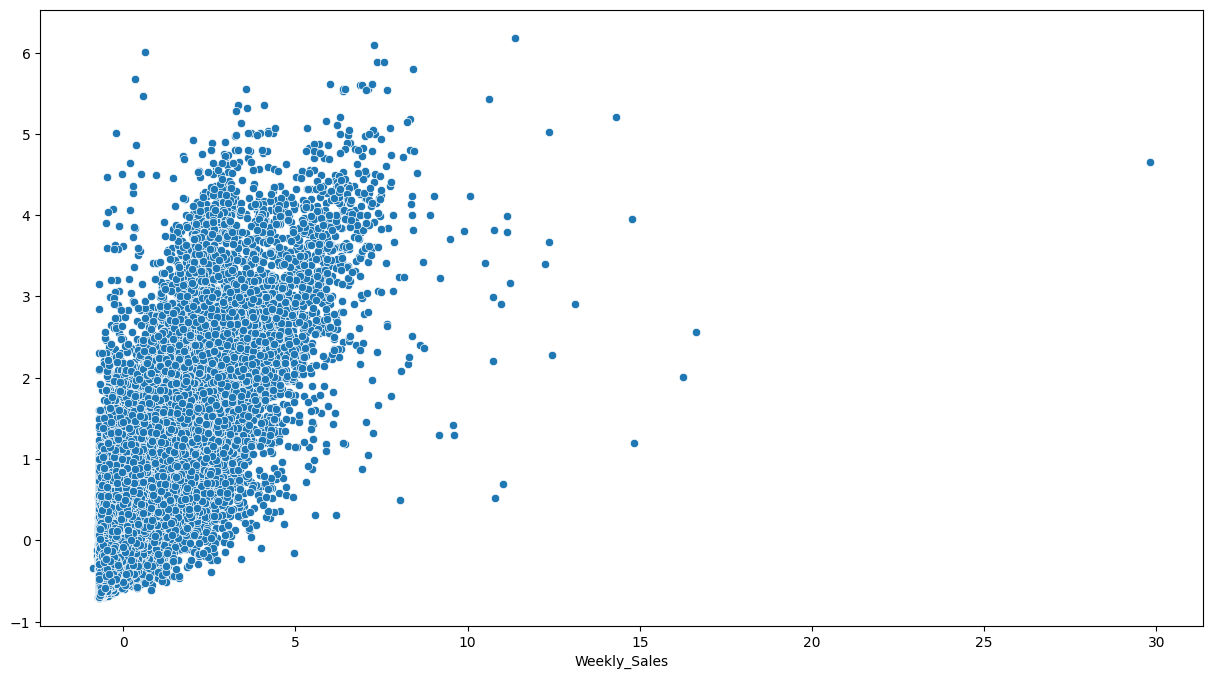

In [41]:
# to get the scatter plot between observed and predicted values of weekly sales from KNN regressor

plt.figure(figsize = (15,8))
sns.scatterplot(x = Y_test, y = Y_pred)

From the above plot it is clear that the predicted and observed values have low corelation and points in the plot are spread out. Lets train with the other model to get improvement in the accuracy score.

# Decision Tree Regressor model

In [42]:
# training the model

from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 34)
decision_tree_regressor.fit(X_train, Y_train)
Y_pred = decision_tree_regressor.predict(X_test)

In [43]:
# to get the performance

print('Mean absolute error: ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Root mean square error: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('Accuracy score: ', decision_tree_regressor.score(X_test, Y_test))


Mean absolute error:  0.09245262846192705
Root mean square error:  0.2559233210963544
Accuracy score:  0.9345660052769184


From the above model it is showing that the acuuracy score is only 0.93.
Lets train with the another model to get the improvement in the accuracy score.

# Random Forest Regressor model

In [44]:
# training the model

from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 400, max_depth = 15, random_state = 12, n_jobs = 5)
rf_regressor.fit(X_train, Y_train)
Y_pred = rf_regressor.predict(X_test)

In [45]:
# to get the performance

print('Mean absolute error: ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Root mean square error: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('Accuracy score: ', rf_regressor.score (X_test, Y_test))


Mean absolute error:  0.09097408381442229
Root mean square error:  0.2112661349864025
Accuracy score:  0.9554093828530094


From the above model it is showing that the acuuracy score is only 0.95.
Lets train with the another model to get the improvement in the accuracy score.

# XGBoost Regressor model

In [46]:
# training the model

xgb_regressor = XGBRegressor(objective = 'reg:linear', n_estimators = 500, max_depth = 6, nthread = 4, learning_rate = 0.5, random_state = 34)
xgb_regressor.fit(X_train, Y_train)
Y_pred = xgb_regressor.predict(X_test)

[13:36:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [47]:
# to get the performance

print('Mean absolute error: ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Root mean square error: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('Accuracy score: ', xgb_regressor.score (X_test, Y_test))


Mean absolute error:  0.09674561624964248
Root mean square error:  0.18878541903757318
Accuracy score:  0.9643942117040265


From the above model, it is clear that the XGBoost has the highest accuracy score of 0.96.
Let's plot the scatter plot between observed and predicted values of weekly sales in the test data.

<AxesSubplot: xlabel='Weekly_Sales'>

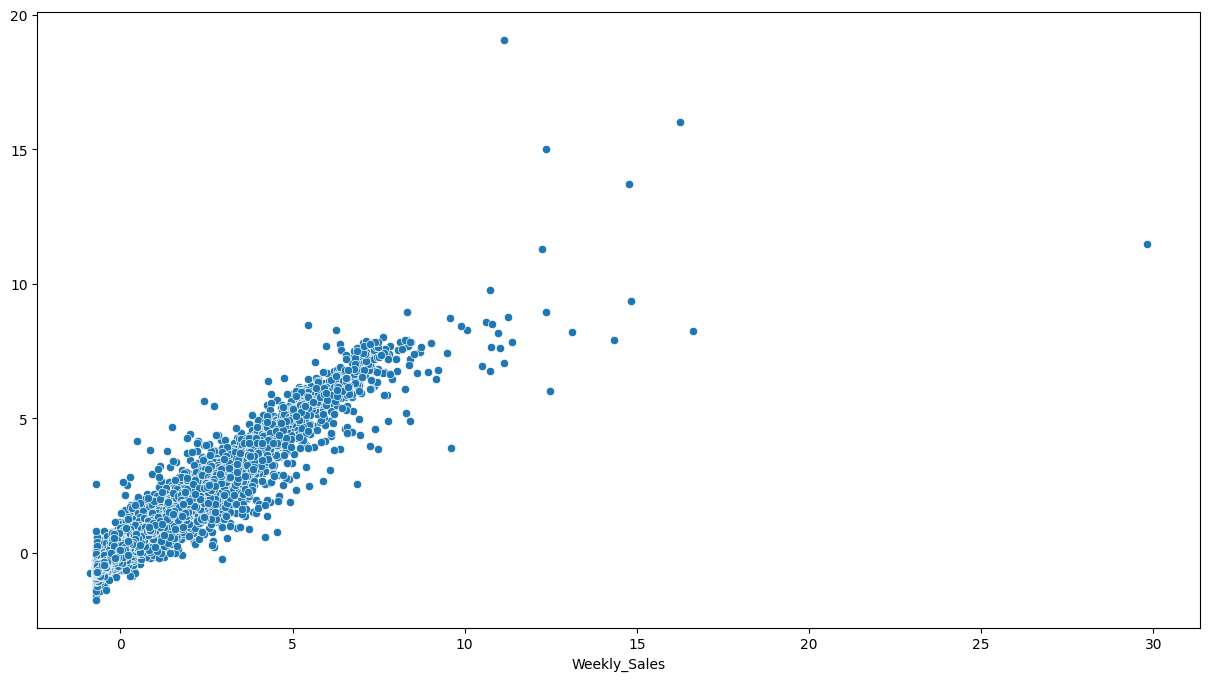

In [48]:
# to scatter plot between observed and predicted values of weekly sales from XGBoost regressor

plt.figure(figsize = (15, 8))
sns.scatterplot(x = Y_test, y = Y_pred)

From the above plot it is clear that the XGBoost model gives the highest accuracy score and the lowest mean square error and root mean square error.

So, XGBoost model works best in this problem when compared to the other models.

# Evaluating the test data 

 Now we are going to evaluate the test data which was provided seperately

In [49]:
# Loading the test data

test_df = pd.read_csv('test.csv')

In [50]:
# to get the shape of the test dataframe

test_df.shape

(115064, 4)

In [51]:
# to get the first 5 rows of test dataset

test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [52]:
# to get the info of test_df

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [53]:
# to get the features of the test_df

test_df.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday'], dtype='object')

In [54]:
# to get the statistical details of the test_df

test_df.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [56]:
# to get the null values of the test_df

test_df.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [57]:
# merging the test dataset with features dataset

test_df = pd.merge(test_df, feature_df.drop(['IsHoliday'], axis=1), how ='left', on = ['Store', 'Date'])



In [58]:
# merging the store dataset with the above test dataset

test_df = pd.merge(test_df, stores_df, how = 'left', on = ['Store'])

In [59]:
# to check the shape of the merged test dataframe

test_df.shape

(115064, 15)

In [60]:
# to get the info of the merged test dataframe

test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   MarkDown1     114915 non-null  float64
 7   MarkDown2     86437 non-null   float64
 8   MarkDown3     105235 non-null  float64
 9   MarkDown4     102176 non-null  float64
 10  MarkDown5     115064 non-null  float64
 11  CPI           76902 non-null   float64
 12  Unemployment  76902 non-null   float64
 13  Type          115064 non-null  object 
 14  Size          115064 non-null  int64  
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


In [61]:
# to get the statistical details of the merged test dataframe

test_df.describe()

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,115064.000000,115064.000000,115064.000000,115064.000000,114915.000000,86437.000000,105235.000000,102176.000000,115064.000000,76902.000000,76902.000000,115064.000000
mean,22.238207,44.339524,53.941804,3.581546,7689.216439,3734.051729,2403.088666,3356.219071,3922.681189,176.961347,6.868733,136497.688921
std,12.809930,30.656410,18.724153,0.239442,10698.760716,8323.495014,13767.939313,7570.501545,19445.150745,41.239967,1.583427,61106.926438
min,1.000000,1.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000,34875.000000
25%,11.000000,18.000000,39.820000,3.431000,1966.460000,180.350000,15.100000,155.460000,1309.300000,138.402033,5.771000,93638.000000
50%,22.000000,37.000000,54.470000,3.606000,4842.290000,742.590000,78.260000,840.940000,2390.430000,192.304445,6.806000,140167.000000
75%,33.000000,74.000000,67.350000,3.766000,9439.140000,2735.670000,272.580000,3096.920000,4227.270000,223.244532,8.036000,202505.000000
max,45.000000,99.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000,219622.000000


In [62]:
# to check the fatures of the merged test dataframe

test_df.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size'],
      dtype='object')

In [63]:
# to check if the merged test_df has null values or not

test_df.isnull().sum()


Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
dtype: int64

In [64]:
# to get the min and max of the weekly sales data

print('Min Date in data: ',test_df['Date'].min())
print('Max Date in data: ',test_df['Date'].max())

Min Date in data:  2012-11-02
Max Date in data:  2013-07-26


# Data Preprocessing for the test_df

In [65]:
# Imputing the null values to the test_df

test_df['MarkDown1'] = test_df['MarkDown1'].fillna(0)
test_df['MarkDown2'] = test_df['MarkDown2'].fillna(0)
test_df['MarkDown3'] = test_df['MarkDown3'].fillna(0)
test_df['MarkDown4'] = test_df['MarkDown4'].fillna(0)
test_df['MarkDown5'] = test_df['MarkDown5'].fillna(0)


In [66]:
# Feature extraction for the test_df
# Creating Year, month & date for the test_df

test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['month_date'] = test_df["Date"].apply(lambda i : i.month)
test_df['day_date'] = test_df["Date"].apply(lambda i : i.month)
test_df['year_date'] = test_df["Date"].apply(lambda i : i.month)

In [67]:
# one hot encoding for the test_df

cols_to_encode = ['Type', 'IsHoliday']
test_df = pd.get_dummies(data = test_df, columns = cols_to_encode, drop_first = True)

In [69]:
# Standard Scaler

standard_scaler = StandardScaler()
feature_cols = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']
transformed_features = standard_scaler.fit_transform(test_df[feature_cols])

test_df[feature_cols] = transformed_features

In [70]:
# to view the transformed test_df

test_df.head()

,Store,Dept,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month_date,day_date,year_date,Type_B,Type_C,IsHoliday_True
0,1,1,2012-11-02,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.127589,-0.186769,0.242483,11,11,11,0,0,0
1,1,1,2012-11-09,0.389776,-1.117379,0.349877,0.076542,-0.163650,0.231072,0.114758,1.128038,-0.186769,0.242483,11,11,11,0,0,0
2,1,1,2012-11-16,-0.054572,-1.376316,0.188588,-0.339931,-0.158833,-0.256122,0.138339,1.128805,-0.186769,0.242483,11,11,11,0,0,0
3,1,1,2012-11-23,0.122206,-1.547548,-0.635385,-0.378880,5.515279,-0.384136,-0.186133,1.129994,-0.186769,0.242483,11,11,11,0,0,1
4,1,1,2012-11-30,-0.085548,-1.564254,-0.487990,-0.379444,0.124436,-0.392364,0.156526,1.131183,-0.186769,0.242483,11,11,11,0,0,0


In [72]:
test_df.isnull().sum()

Store                 0
Dept                  0
Date                  0
Temperature           0
Fuel_Price            0
MarkDown1             0
MarkDown2             0
MarkDown3             0
MarkDown4             0
MarkDown5             0
CPI               38162
Unemployment      38162
Size                  0
month_date            0
day_date              0
year_date             0
Type_B                0
Type_C                0
IsHoliday_True        0
dtype: int64

Here, CPI and Unemployement columns has null values, so we are going to impute those null values.

In [84]:
# Imputing the null values

test_df['CPI'] = test_df['CPI'].fillna(test_df['CPI'].mean())
test_df['Unemployment'] = test_df['Unemployment'].fillna(test_df['Unemployment'].mean())

In [85]:
# to check whether the valuse are imputed or not

test_df.isnull().sum()

Store             0
Dept              0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI               0
Unemployment      0
Size              0
month_date        0
day_date          0
year_date         0
Type_B            0
Type_C            0
IsHoliday_True    0
dtype: int64

As we know that from the above models, XGBoost has the highest accuracy score of 0.96. So we are going to use that model to evaluate the test_df.

In [86]:
xgb = XGBRegressor()

In [87]:
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [90]:
new_test_df = test_df.drop(columns = 'Date')

In [92]:
# validating the test data

Y_validation = xgb.predict(new_test_df)

In [93]:
# assigning the validation to weekly sales

test_df['Weekly_Sales'] = Y_validation

In [95]:
# to get the predicted values

test_df

,Store,Dept,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month_date,day_date,year_date,Type_B,Type_C,IsHoliday_True,Weekly_Sales
0,1,1,2012-11-02,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.127589e+00,-1.867690e-01,0.242483,11,11,11,0,0,0,0.280390
1,1,1,2012-11-09,0.389776,-1.117379,0.349877,0.076542,-0.163650,0.231072,0.114758,1.128038e+00,-1.867690e-01,0.242483,11,11,11,0,0,0,0.538941
2,1,1,2012-11-16,-0.054572,-1.376316,0.188588,-0.339931,-0.158833,-0.256122,0.138339,1.128805e+00,-1.867690e-01,0.242483,11,11,11,0,0,0,0.393822
3,1,1,2012-11-23,0.122206,-1.547548,-0.635385,-0.378880,5.515279,-0.384136,-0.186133,1.129994e+00,-1.867690e-01,0.242483,11,11,11,0,0,1,0.288811
4,1,1,2012-11-30,-0.085548,-1.564254,-0.487990,-0.379444,0.124436,-0.392364,0.156526,1.131183e+00,-1.867690e-01,0.242483,11,11,11,0,0,0,0.748868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,1.180737,0.239949,-0.265252,-0.247550,-0.166478,-0.073534,-0.038724,2.030861e-16,4.375869e-16,-0.299095,6,6,6,1,0,0,-0.706872
115060,45,98,2013-07-05,1.258177,0.135539,0.131947,-0.072569,-0.122504,0.390623,-0.123823,2.030861e-16,4.375869e-16,-0.299095,7,7,7,1,0,0,-0.740762
115061,45,98,2013-07-12,1.358048,0.135539,-0.363645,-0.132261,-0.160203,-0.309964,-0.091145,2.030861e-16,4.375869e-16,-0.299095,7,7,7,1,0,0,-0.700011
115062,45,98,2013-07-19,1.543371,0.649236,-0.441104,-0.237805,-0.151217,-0.362909,-0.147247,2.030861e-16,4.375869e-16,-0.299095,7,7,7,1,0,0,-0.700895


Here we have evaluated the test dataset by using the XGBooster model we created and found the weekly sales.